In [1]:
from feos.pcsaft import *
from feos.eos import *

import si_units as si
import matplotlib.pyplot as plt
import numpy as np

## Ideal mixture

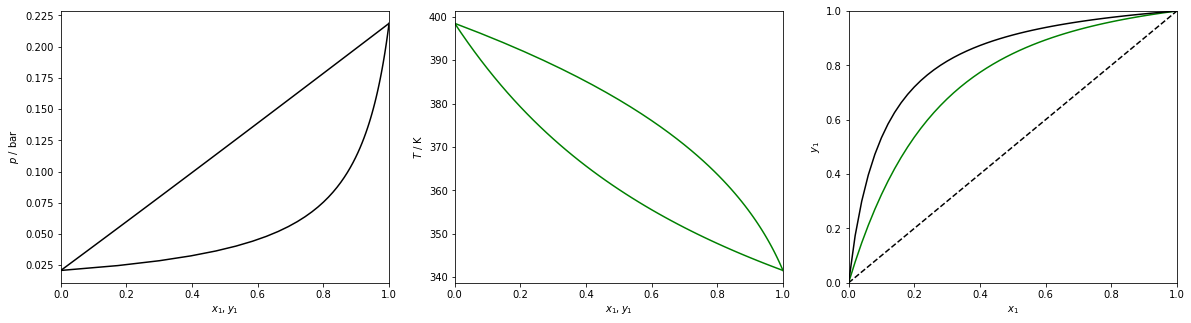

In [2]:
params = PcSaftParameters.from_json(['hexane', 'octane'], '../../parameters/pcsaft/gross2001.json')
saft = EquationOfState.pcsaft(params)
dia_p = PhaseDiagram.binary_vle(saft, 300*si.KELVIN)
dia_t = PhaseDiagram.binary_vle(saft, si.BAR)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.liquid.molefracs[:,0], dia_p.liquid.pressure/si.BAR, '-k')
ax[0].plot(dia_p.vapor.molefracs[:,0], dia_p.vapor.pressure/si.BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.liquid.molefracs[:,0], dia_t.liquid.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.vapor.molefracs[:,0], dia_t.vapor.temperature/si.KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.liquid.molefracs[:,0], dia_t.vapor.molefracs[:,0], '-g')
ax[2].plot(dia_p.liquid.molefracs[:,0], dia_p.vapor.molefracs[:,0], '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');

## Azeotropic mixture

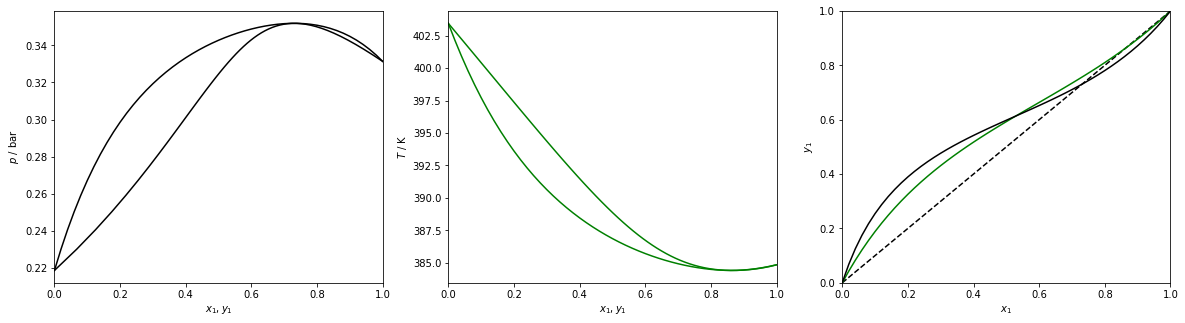

In [3]:
params = PcSaftParameters.from_multiple_json([(['acetone'], '../../parameters/pcsaft/gross2006.json'), (['hexane'], '../../parameters/pcsaft/gross2001.json')])
saft = EquationOfState.pcsaft(params)
dia_p = PhaseDiagram.binary_vle(saft, 300*si.KELVIN)
dia_t = PhaseDiagram.binary_vle(saft, 5*si.BAR)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.liquid.molefracs[:,0], dia_p.liquid.pressure/si.BAR, '-k')
ax[0].plot(dia_p.vapor.molefracs[:,0], dia_p.vapor.pressure/si.BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.liquid.molefracs[:,0], dia_t.liquid.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.vapor.molefracs[:,0], dia_t.vapor.temperature/si.KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.liquid.molefracs[:,0], dia_t.vapor.molefracs[:,0], '-g')
ax[2].plot(dia_p.liquid.molefracs[:,0], dia_p.vapor.molefracs[:,0], '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');

## Supercritical mixture

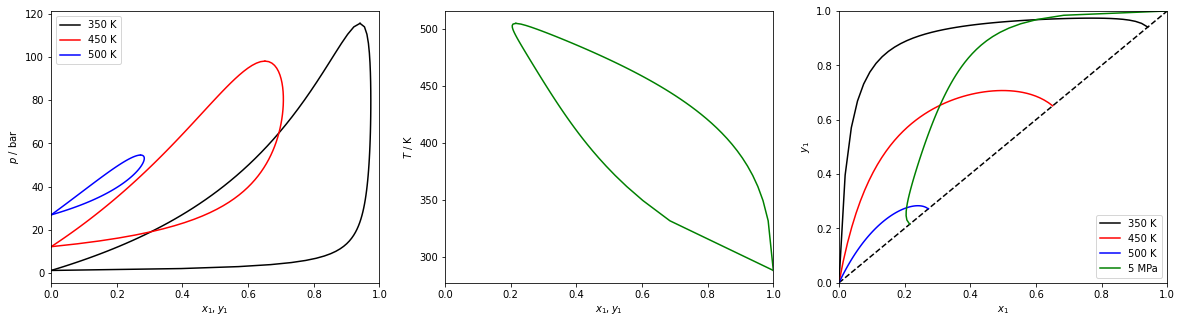

In [4]:
params = PcSaftParameters.from_json(['carbon dioxide', 'hexane'], '../../parameters/pcsaft/gross2001.json')
saft = EquationOfState.pcsaft(params)
T_vec = [350*si.KELVIN, 450*si.KELVIN, 500*si.KELVIN]
c_vec = ['k', 'r', 'b']
dia_p = [PhaseDiagram.binary_vle(saft, T) for T in T_vec]
dia_t = PhaseDiagram.binary_vle(saft, 50*si.BAR)

f, ax = plt.subplots(1,3,figsize=(20,5))
for d,c,T in zip(dia_p, c_vec, T_vec):
    ax[0].plot(d.liquid.molefracs[:,0], d.liquid.pressure/si.BAR, color=c, label=f'{T}')
    ax[0].plot(d.vapor.molefracs[:,0], d.vapor.pressure/si.BAR, color=c)
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')
ax[0].legend()

ax[1].plot(dia_t.liquid.molefracs[:,0], dia_t.liquid.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.vapor.molefracs[:,0], dia_t.vapor.temperature/si.KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
for d,c,T in zip(dia_p, c_vec, T_vec):
    ax[2].plot(d.liquid.molefracs[:,0], d.vapor.molefracs[:,0], color=c, label=f'{T}')
ax[2].plot(dia_t.liquid.molefracs[:,0], dia_t.vapor.molefracs[:,0], '-g', label=f'{50*si.BAR}')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$')
ax[2].legend();

##  Liquid-liquid equilibrium

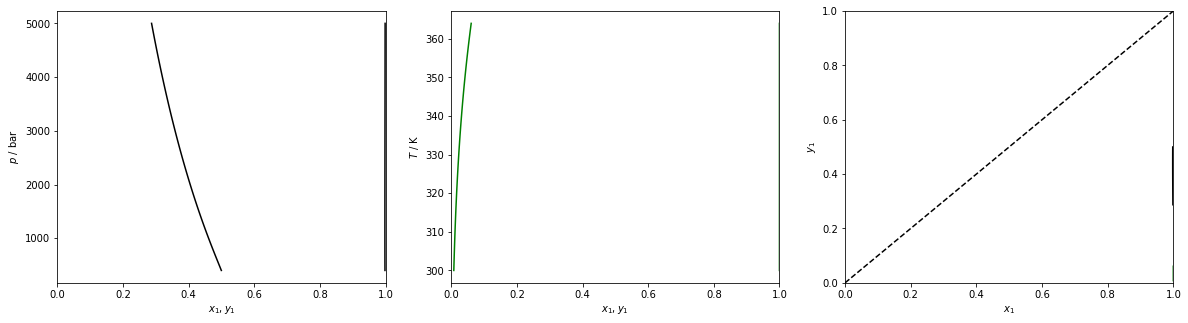

In [5]:
params = PcSaftParameters.from_multiple_json([(['water'], '../../parameters/pcsaft/gross2002.json'), (['octane'], '../../parameters/pcsaft/gross2001.json')])

saft = EquationOfState.pcsaft(params)
dia_p = PhaseDiagram.lle(saft, 500*si.KELVIN, np.array([0.5, 0.5])*si.MOL, si.BAR, 5000*si.BAR)
dia_t = PhaseDiagram.lle(saft, si.BAR, np.array([0.5, 0.5])*si.MOL, 300*si.KELVIN, 364*si.KELVIN)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.liquid.molefracs[:,0], dia_p.liquid.pressure/si.BAR, '-k')
ax[0].plot(dia_p.vapor.molefracs[:,0], dia_p.vapor.pressure/si.BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.liquid.molefracs[:,0], dia_t.liquid.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.vapor.molefracs[:,0], dia_t.vapor.temperature/si.KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.liquid.molefracs[:,0], dia_t.vapor.molefracs[:,0], '-g')
ax[2].plot(dia_p.liquid.molefracs[:,0], dia_p.vapor.molefracs[:,0], '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');

##  Heteroazeotropic mixture

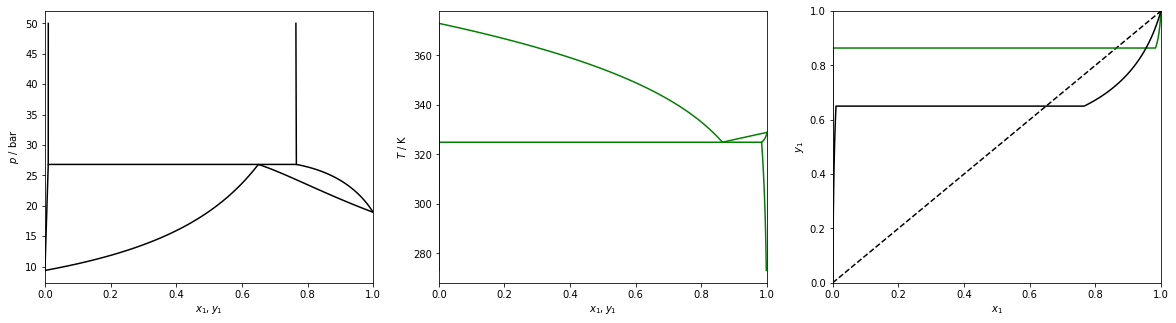

In [6]:
params = PcSaftParameters.from_multiple_json([(['acetone'], '../../parameters/pcsaft/gross2006.json'), (['water'], '../../parameters/pcsaft/gross2002.json')])

saft = EquationOfState.pcsaft(params)
dia_p = PhaseDiagram.binary_vlle(saft, 450*si.KELVIN, (0.005, 0.9), 50*si.BAR, 25*si.BAR, 101)
dia_t = PhaseDiagram.binary_vlle(saft, si.BAR, (0.001, 0.99), 0*si.CELSIUS, 50*si.CELSIUS, 101)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.vle.liquid.molefracs[:,0], dia_p.vle.liquid.pressure/si.BAR, '-k')
ax[0].plot(dia_p.vle.vapor.molefracs[:,0], dia_p.vle.vapor.pressure/si.BAR, '-k')
ax[0].plot(dia_p.lle.vapor.molefracs[:,0], dia_p.lle.vapor.pressure/si.BAR, '-k')
ax[0].plot(dia_p.lle.liquid.molefracs[:,0], dia_p.lle.liquid.pressure/si.BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.vle.liquid.molefracs[:,0], dia_t.vle.liquid.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.vle.vapor.molefracs[:,0], dia_t.vle.vapor.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.lle.liquid.molefracs[:,0], dia_t.lle.liquid.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.lle.vapor.molefracs[:,0], dia_t.lle.vapor.temperature/si.KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.vle.liquid.molefracs[:,0], dia_t.vle.vapor.molefracs[:,0], '-g')
ax[2].plot(dia_p.vle.liquid.molefracs[:,0], dia_p.vle.vapor.molefracs[:,0], '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');

##  Two associating components

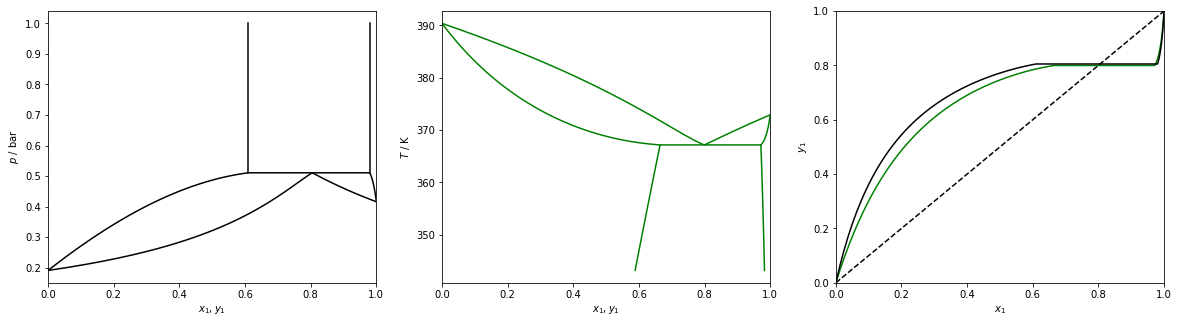

In [7]:
params = PcSaftParameters.from_json(['water', '1-butanol'], '../../parameters/pcsaft/gross2002.json')


saft = EquationOfState.pcsaft(params)
dia_p = PhaseDiagram.binary_vlle(saft, 350*si.KELVIN, (0.55, 0.98), si.BAR, 0.5*si.BAR, 101)
dia_t = PhaseDiagram.binary_vlle(saft, si.BAR, (0.5,0.995), 70*si.CELSIUS, 80*si.CELSIUS, 101)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.vle.liquid.molefracs[:,0], dia_p.vle.liquid.pressure/si.BAR, '-k')
ax[0].plot(dia_p.vle.vapor.molefracs[:,0], dia_p.vle.vapor.pressure/si.BAR, '-k')
ax[0].plot(dia_p.lle.vapor.molefracs[:,0], dia_p.lle.vapor.pressure/si.BAR, '-k')
ax[0].plot(dia_p.lle.liquid.molefracs[:,0], dia_p.lle.liquid.pressure/si.BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.vle.liquid.molefracs[:,0], dia_t.vle.liquid.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.vle.vapor.molefracs[:,0], dia_t.vle.vapor.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.lle.liquid.molefracs[:,0], dia_t.lle.liquid.temperature/si.KELVIN, '-g')
ax[1].plot(dia_t.lle.vapor.molefracs[:,0], dia_t.lle.vapor.temperature/si.KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.vle.liquid.molefracs[:,0], dia_t.vle.vapor.molefracs[:,0], '-g')
ax[2].plot(dia_p.vle.liquid.molefracs[:,0], dia_p.vle.vapor.molefracs[:,0], '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');